<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Électrocinétique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Filtrage linéaire | Effet des filtres sur un signal périodique
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique
## Effet des filtres
Dans ce notebook, on teste les effets d'un filtre linéaire sur divers signaux polyharrmoniques.<br/>

Lorqu'un signal sinusoïdal de la forme $e(t)=e_0\cos(\omega t + \phi_0)$ passe par un filtre, le signal résultant est modifié et peut être exprimé sous la forme :
$$s(t)=e_0\left|\underline{H}\right|\cos(\omega t + \phi_0 + \text{arg}(\underline{H}))$$
où $\underline{H}$ est la fonction de transfert du filtre utilisé.

&nbsp;
De part la linéarité du filtre, un signal polyharmonique sera traité conformément au principe de superposition. Chaque harmonique du signal d'entrée subira les effets du filtre selon la relation précédente, et le signal de sortie sera la combinaison des signaux de sortie calculés indépendemment les uns des autres.

## Fonctions de transfert des filtres passifs usuels
La fonction de transfert d'un filtre passe-bas du premier ordre s'écrit : 
$$\underline{H}_\text{PB}=\dfrac{\omega_0}{\omega_0+\text{j}\omega}$$

&nbsp;
La fonction de transfert d'un filtre passe-haut du premier ordre s'écrit : 
$$\underline{H}_\text{PH}=\dfrac{\text{j}\omega}{\text{j}\omega +\omega_0}$$

&nbsp;
La fonction de transfert d'un filtre passe-bande s'écrit : 
$$\underline{H}_\text{PBde}=\dfrac{1}{1+\text{j}Q\left(\frac{\omega}{\omega_0}-\frac{\omega_0}{\omega}\right)}$$


## Paramètres physiques du problème étudié


In [2]:
# Paramètres physiques du filtre
omega0 = 50.0 # Pulsation propre du filtre
Q = 2. # Facteur de qualité du filtre passe-bande

# Paramètres physiques du signal entrant
e0 = 2 # Amplitude du fondamental
omega = 50. # pulsation fondamentale
periode = 4*np.pi/omega # période du signal entrant
phi0 = 0 # Phase du fondamental

### Signaux disponibles
Plusieurs signaux ont été implémentés :
* un signal quelconque auquel on peut rajouter des harmoniques en complétant la liste de liste avec des harmoniques notées sous la forme `[amplitude, pulsation, phase]`;
* un signal carré de période `periode` et d'amplitude `e0` ;
* un signal triangle de période `periode` et d'amplitude `e0`.

In [3]:
# Signaux périodiques disponibles

# Signal quelconque, à compléter avec des harmoniques sous la forme [amplitude, pulsation, phase]
#e=[[e0,omega,0], [e0/5,20*omega,0]]

# Signal carré
#e=[]
#for i in range(100):
#    e.append([4*e0/(np.pi*(2*i+1)), (2*i+1)*omega, np.pi/2])

#Signal triangle
e=[]
for i in range(100):
    e.append([8*e0/((np.pi*(2*i+1))**2), (2*i+1)*omega, 0])

### Fonction de transfert disponibles
Les fonctions de transfert des filtres passifs classiques ont été implémentées : 
* Filtre passe-bas du premier ordre de pulsation propre $\omega_0$ ;
* Filtre passe-haut du premier ordre de pulsation propre $\omega_0$ ;
* Filtre passe-bande du second ordre de pulsation propre $\omega_0$.


In [4]:
# Fonction de transfert
def HPB(omega) :
    return omega0/(omega0+1j*omega)

def HPH(omega) :
    return 1j*omega/(1j*omega+omega0)

def HPBde(omega) :
    return 1/(1+1j*Q*(omega/omega0 - omega0/omega))

## Calcul des signaux d'entrée et de sortie 
Les signaux d'entrée et de sortie sont reconstitués sur la base d'une durée de `num=4` périodes, discrétisées par `N=10000` points.

In [5]:
N=10000
t=np.linspace(0,4*2*np.pi/omega,N)

# Signal d'entrée
def entree(e,temp) :
    e_in = 0
    for i in range(len(e)):
        e_in += e[i][0]*np.cos(e[i][1]*temp+e[i][2])
    return e_in

# Signal de sortie passe-bas
def sortie_PB(e,temp) :
    s_out = 0
    for i in range(len(e)):
        s_out += e[i][0]*np.abs(HPB(e[i][1]))*np.cos(e[i][1]*temp+e[i][2]+np.angle(HPB(e[i][1])))
    return s_out

# Signal de sortie passe-haut
def sortie_PH(e,temp) :
    s_out = 0
    for i in range(len(e)):
        s_out += e[i][0]*np.abs(HPH(e[i][1]))*np.cos(e[i][1]*temp+e[i][2]+np.angle(HPH(e[i][1])))
    return s_out

# Signal de sortie passe-bande
def sortie_PBde(e,temp) :
    s_out = 0
    for i in range(len(e)):
        s_out += e[i][0]*np.abs(HPBde(e[i][1]))*np.cos(e[i][1]*temp+e[i][2]+np.angle(HPBde(e[i][1])))
    return s_out

## Tracé des signaux entrant et sortants
La figure ci-dessous regroupe les tracés des signaux entrant, sortant avec filtre passe-bas, passe-haut et passe-bande.

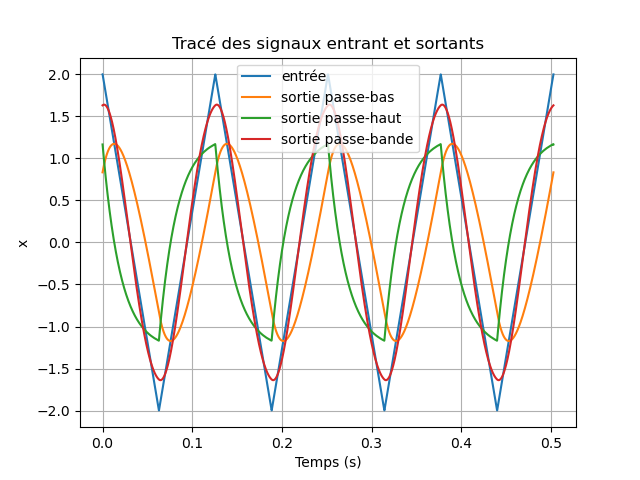

In [6]:
plt.figure()
plt.title('Tracé des signaux entrant et sortants')
plt.plot(t,entree(e,t), label='entrée')
plt.plot(t,sortie_PB(e,t), label='sortie passe-bas')
plt.plot(t,sortie_PH(e,t), label='sortie passe-haut')
plt.plot(t,sortie_PBde(e,t), label='sortie passe-bande')
plt.grid(True)
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('x')
plt.show()

## Tracé des diagrammes de Bode
La figure ci-dessous regroupe les diagrammes de Bode en gain des filtres passe-bas, passe-haut et passe-bande pour des pulsations comprises entre $\omega_\text{min}=10^{-1}~\text{rad.s}^{-1}$ et $\omega_\text{max}=10^{5}~\text{rad.s}^{-1}$.

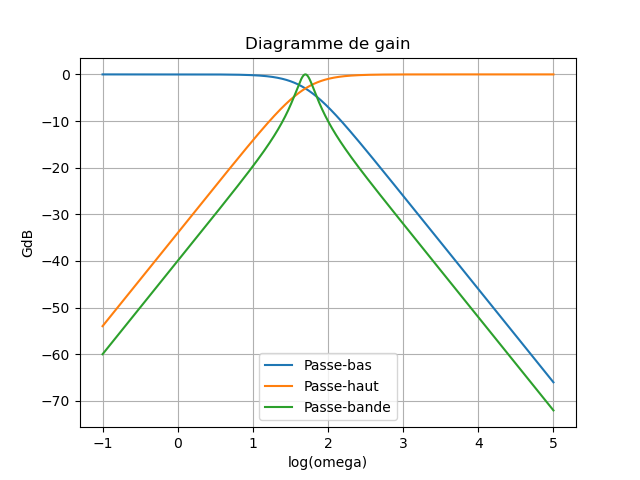

In [7]:
plt.figure()
plt.title('Diagramme de gain')
omega=np.logspace(-1,5,10000)
plt.plot(np.log10(omega), 20*np.log10(np.abs(HPB(omega))), label='Passe-bas')
plt.plot(np.log10(omega), 20*np.log10(np.abs(HPH(omega))), label='Passe-haut')
plt.plot(np.log10(omega), 20*np.log10(np.abs(HPBde(omega))), label='Passe-bande')
plt.legend()
plt.xlabel('log(omega)')
plt.ylabel('GdB')
plt.grid(True)
plt.show()

La figure ci-dessous regroupe les diagrammes de Bode en phase des filtres passe-bas, passe-haut et passe-bande  pour des pulsations comprises entre $\omega_\text{min}=10^{-1}~\text{rad.s}^{-1}$ et $\omega_\text{max}=10^{5}~\text{rad.s}^{-1}$.

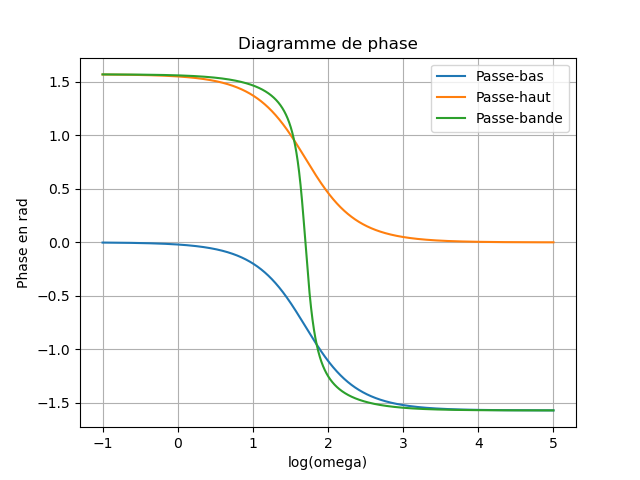

In [8]:
plt.figure()
plt.title('Diagramme de phase')
omega=np.logspace(-1,5,10000)
plt.plot(np.log10(omega), np.angle(HPB(omega)), label='Passe-bas')
plt.plot(np.log10(omega), np.angle(HPH(omega)), label='Passe-haut')
plt.plot(np.log10(omega), np.angle(HPBde(omega)), label='Passe-bande')
plt.legend()
plt.xlabel('log(omega)')
plt.ylabel('Phase en rad')
plt.grid(True)
plt.show()